In [48]:
import pandas as pd
import matplotlib.pyplot as plt

In [54]:
# Load the dataset
url = "https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv"
data = pd.read_csv(url, skiprows=23)  # Skip the metadata rows

/var/folders/5f/bs5073z16fnf799kvtt_t0xr0000gn/T/ipykernel_34317/2111477018.py:3: DtypeWarning: Columns (2,10,12,14,15,16,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(url, skiprows=23)  # Skip the metadata rows


In [55]:
# Display the first few rows to understand the structure
print("First few rows of the dataset:")
display(data.head())

# Display column names
print("\nColumn Names in the DataFrame:")
print(data.columns.tolist())

First few rows of the dataset:


,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,10-apr-1996 14:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,0,0,0,25,81,0.0,35000,32,5
1,31-jul-1996 08:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0,0,0,25,82,0.0,40000,45,5
2,31-jul-1996 09:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0,0,0,80,81,0.0,8000,32,7
3,31-jul-1996 10:00,0,0.0,0,12.9,0,11.3,9.8,0.0,0,...,0,0,0,0,25,82,0.0,28000,35,6
4,31-jul-1996 11:00,0,0.0,0,14.5,0,10.8,7.0,0.0,0,...,0,0,0,0,2,11,0.0,40000,40,6



Column Names in the DataFrame:
['date', 'ind', 'rain', 'ind.1', 'temp', 'ind.2', 'wetb', 'dewpt', 'vappr', 'rhum', 'msl', 'ind.3', 'wdsp', 'ind.4', 'wddir', 'ww', 'w', 'sun', 'vis', 'clht', 'clamt']


In [56]:
# Clean column names by stripping spaces and converting to lowercase
data.columns = data.columns.str.strip().str.lower()

# Display cleaned column names
print("\nCleaned Column Names:")
print(data.columns.tolist())


Cleaned Column Names:
['date', 'ind', 'rain', 'ind.1', 'temp', 'ind.2', 'wetb', 'dewpt', 'vappr', 'rhum', 'msl', 'ind.3', 'wdsp', 'ind.4', 'wddir', 'ww', 'w', 'sun', 'vis', 'clht', 'clamt']


In [57]:
# Check if 'date' column exists
if 'date' in data.columns:
    # Convert the 'date' column to datetime
    data['date'] = pd.to_datetime(data['date'], format="%d-%b-%Y %H:%M", errors='coerce')
    
    # Check for any parsing errors
    num_invalid_dates = data['date'].isna().sum()
    if num_invalid_dates > 0:
        print(f"Warning: {num_invalid_dates} rows have invalid dates and will be dropped.")
        # Drop rows with invalid dates
        data = data.dropna(subset=['date'])
    else:
        print("All dates parsed successfully.")
    
    # Set 'date' as the index
    data = data.set_index('date')
    print("Set 'date' as the DataFrame index.")
else:
    print("Error: 'date' column not found in the DataFrame. Please check the column names.")

All dates parsed successfully.
Set 'date' as the DataFrame index.


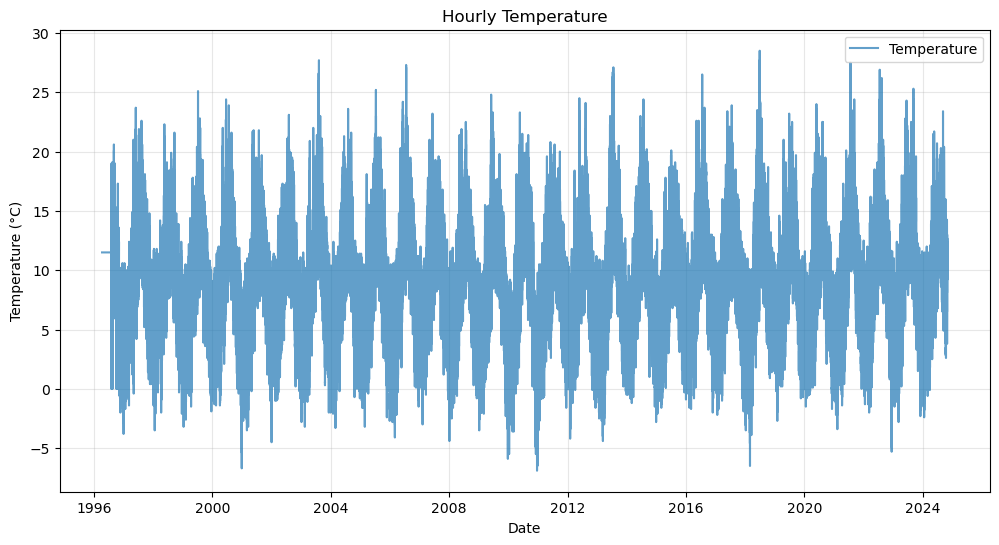

In [58]:
# Convert columns to numeric where applicable
data["temp"] = pd.to_numeric(data["temp"], errors="coerce")
data["wdsp"] = pd.to_numeric(data["wdsp"], errors="coerce")

# Plot Temperature
plt.figure(figsize=(12, 6))
plt.plot(data.index, data["temp"], alpha=0.7, label="Temperature")
plt.title("Hourly Temperature")
plt.ylabel("Temperature (°C)")
plt.xlabel("Date")
plt.grid(alpha=0.3)
plt.legend()
plt.show()

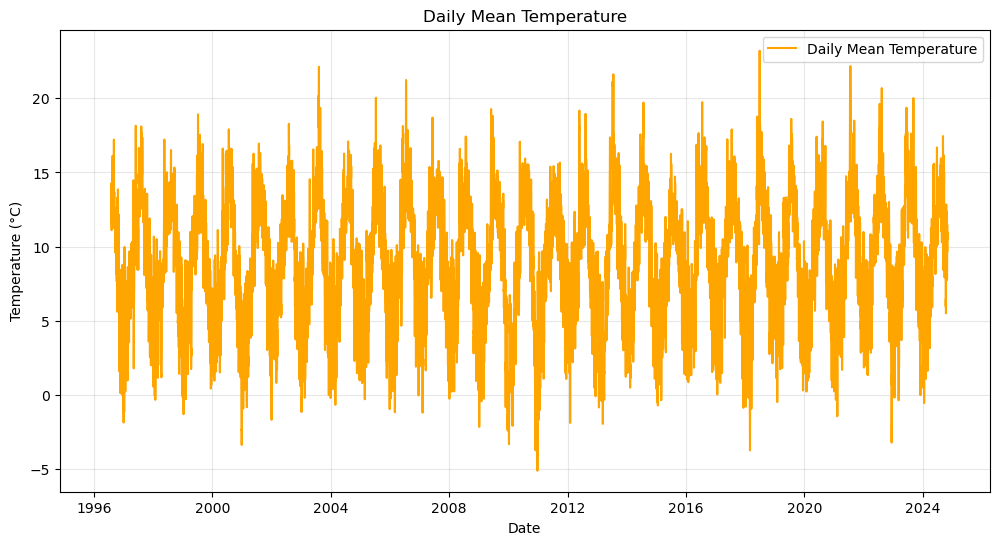

In [59]:
# Mean temperature each day
daily_mean_temp = data["temp"].resample("D").mean()
plt.figure(figsize=(12, 6))
plt.plot(daily_mean_temp.index, daily_mean_temp, color="orange", label="Daily Mean Temperature")
plt.title("Daily Mean Temperature")
plt.ylabel("Temperature (°C)")
plt.xlabel("Date")
plt.grid(alpha=0.3)
plt.legend()
plt.show()

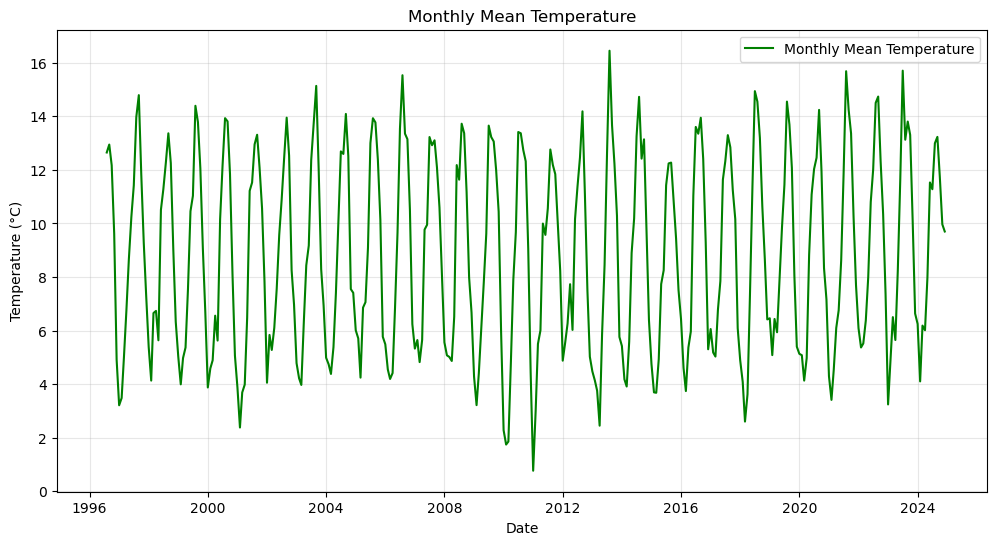

In [60]:
monthly_mean_temp = data["temp"].resample("M").mean()
plt.figure(figsize=(12, 6))
plt.plot(monthly_mean_temp.index, monthly_mean_temp, color="green", label="Monthly Mean Temperature")
plt.title("Monthly Mean Temperature")
plt.ylabel("Temperature (°C)")
plt.xlabel("Date")
plt.grid(alpha=0.3)
plt.legend()
plt.show()

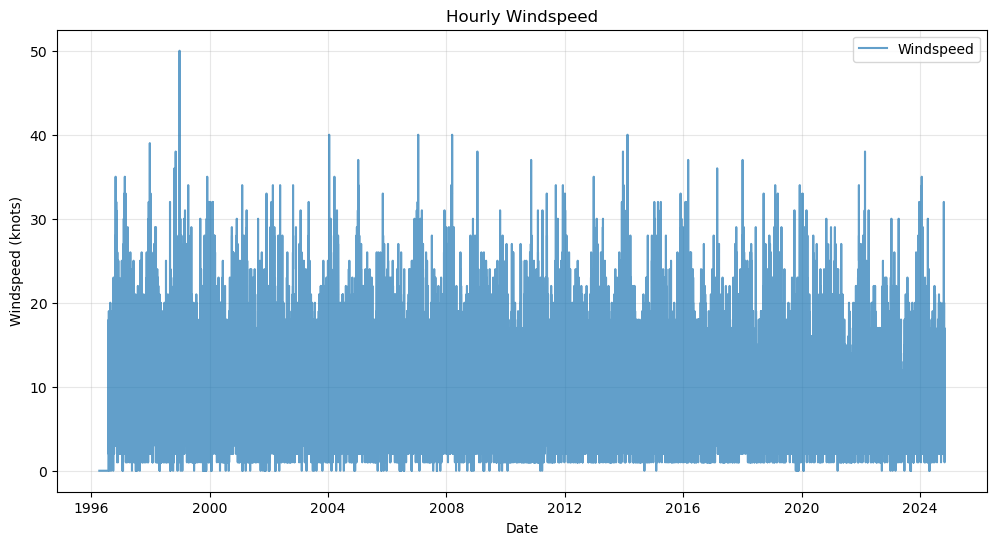

In [61]:
# Plot Windspeed
plt.figure(figsize=(12, 6))
plt.plot(data.index, data["wdsp"], alpha=0.7, label="Windspeed")
plt.title("Hourly Windspeed")
plt.ylabel("Windspeed (knots)")
plt.xlabel("Date")
plt.grid(alpha=0.3)
plt.legend()
plt.show()

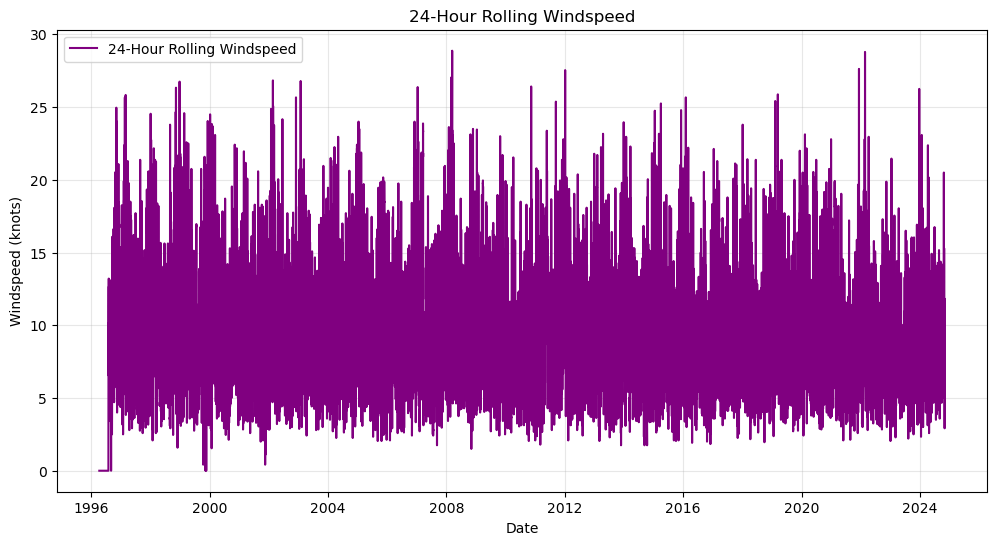

In [62]:
# Rolling windspeed over 24 hours
rolling_wind = data["wdsp"].rolling("24H").mean()
plt.figure(figsize=(12, 6))
plt.plot(rolling_wind.index, rolling_wind, color="purple", label="24-Hour Rolling Windspeed")
plt.title("24-Hour Rolling Windspeed")
plt.ylabel("Windspeed (knots)")
plt.xlabel("Date")
plt.grid(alpha=0.3)
plt.legend()
plt.show()

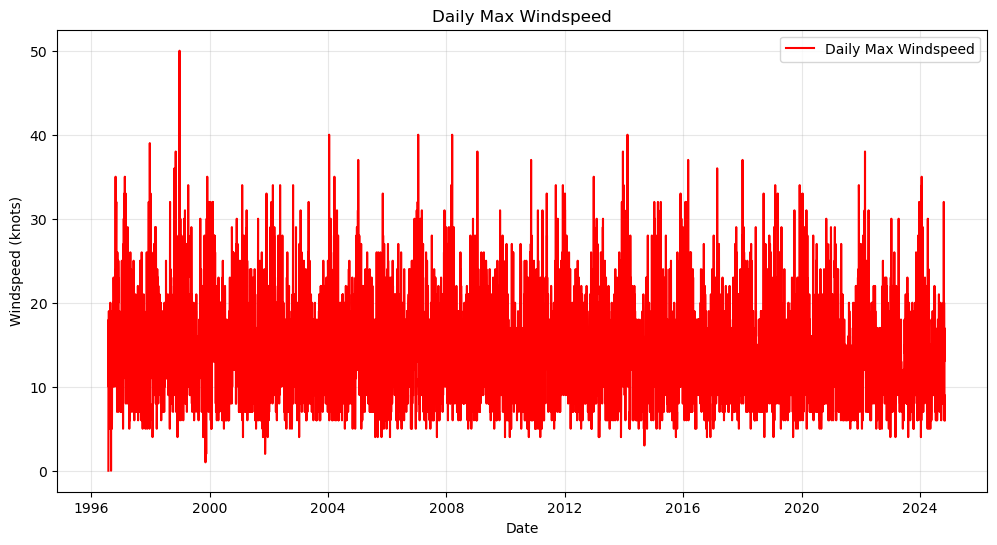

In [63]:
# Max windspeed each day
daily_max_wind = data["wdsp"].resample("D").max()
plt.figure(figsize=(12, 6))
plt.plot(daily_max_wind.index, daily_max_wind, color="red", label="Daily Max Windspeed")
plt.title("Daily Max Windspeed")
plt.ylabel("Windspeed (knots)")
plt.xlabel("Date")
plt.grid(alpha=0.3)
plt.legend()
plt.show()

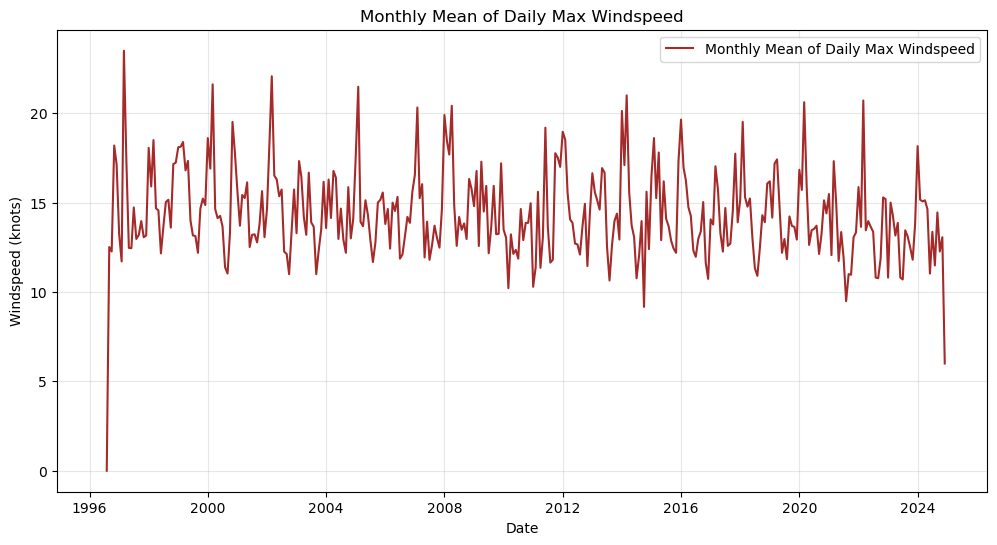

In [64]:
# Monthly mean of the daily max windspeeds
monthly_mean_max_wind = daily_max_wind.resample("M").mean()
plt.figure(figsize=(12, 6))
plt.plot(monthly_mean_max_wind.index, monthly_mean_max_wind, color="brown", label="Monthly Mean of Daily Max Windspeed")
plt.title("Monthly Mean of Daily Max Windspeed")
plt.ylabel("Windspeed (knots)")
plt.xlabel("Date")
plt.grid(alpha=0.3)
plt.legend()
plt.show()